In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [39]:
df = pd.read_csv('/Users/yulun/Desktop/Facebook Metrics/Facebook Metrics of Cosmetic Brand.csv')
df.head()

,Unnamed: 0,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


### Overview of Data

In [40]:
df.shape

(500, 20)

In [41]:
df.describe()

,Unnamed: 0,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,249.500000,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,144.481833,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,0.000000,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,124.750000,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,249.500000,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,374.250000,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,499.000000,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [42]:
# Check missing values
print(df.isna().sum())
# Drop NA
df.dropna(inplace=True)
print(df.isna().sum())

Unnamed: 0                                                             0
Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked 

## Distribution of Post Type

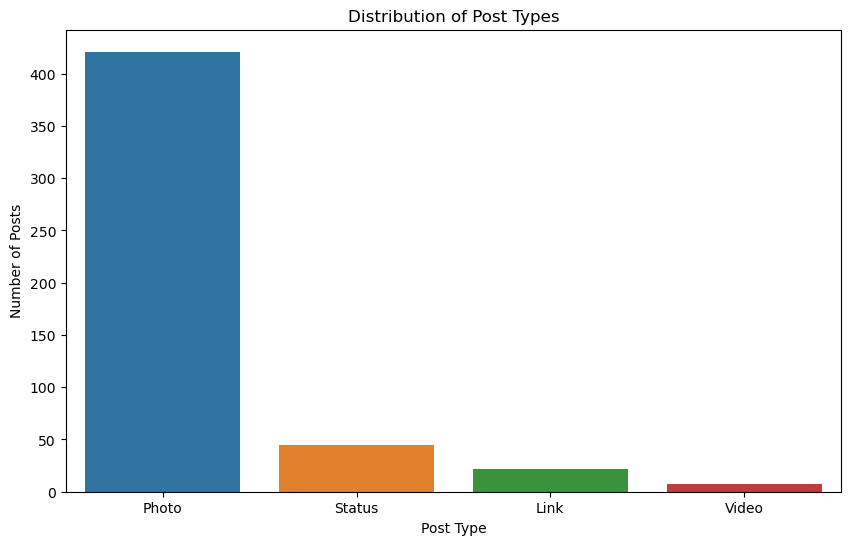

In [43]:
# Distribution of post types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type')
plt.title('Distribution of Post Types')
plt.xlabel('Post Type')
plt.ylabel('Number of Posts')
plt.show()

The main post type here is photo

## Monthly, Weekly and Hourly Post Trend

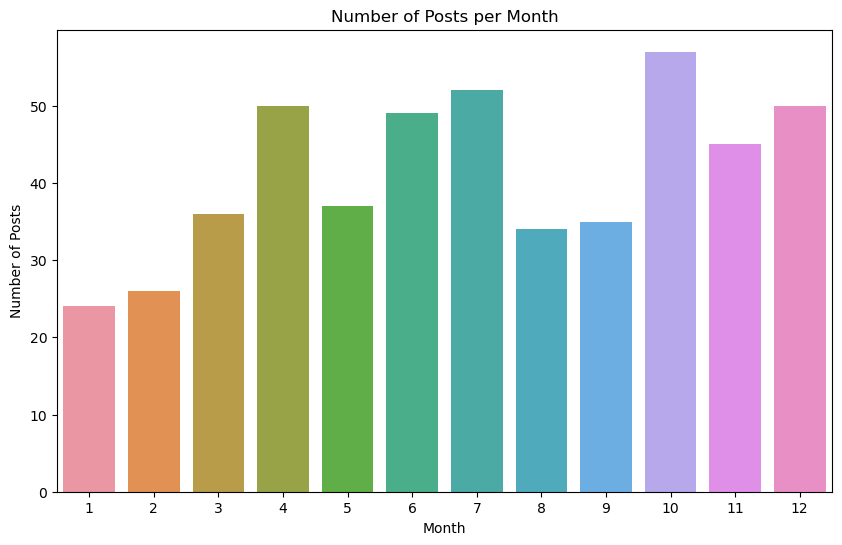

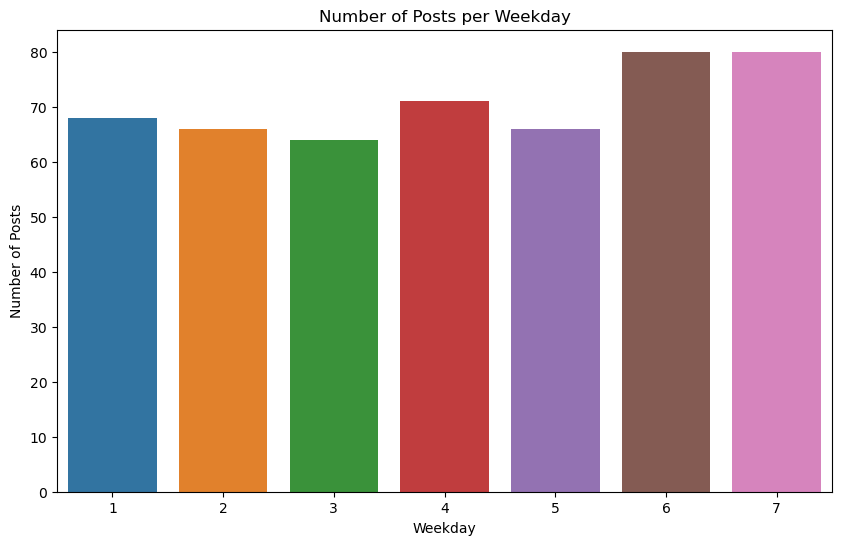

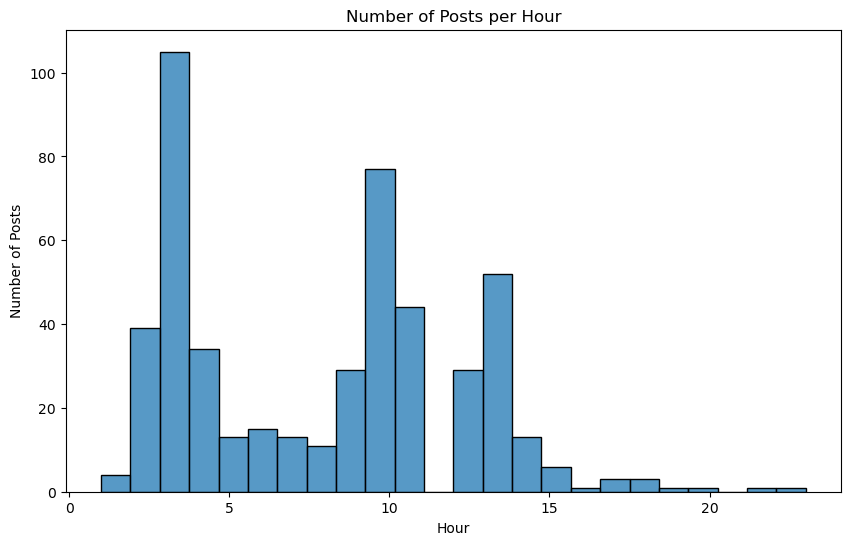

In [44]:
# Monthly post distribution
plt.figure(figsize = (10, 6))
sns.countplot(data=df, x='Post Month')
plt.title('Number of Posts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.show()

# Weekly post distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Post Weekday')
plt.title('Number of Posts per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Posts')
plt.show()

# Hourly post distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Post Hour', bins=24, kde=False)
plt.title('Number of Posts per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Posts')
plt.show()

The post distribution is higher in April, June, July, Oct and December.

Number of posts per weekdays are evenly distributed.

There are some high number of posts per hour at some particular timing, around 4am, 10am and 1pm. However, there might be time-zone difference in the data which might not be accounted for due to the lack of time-zone data in this dataset.

## Engagement Metric Analysis

### Total interactions by Post Type

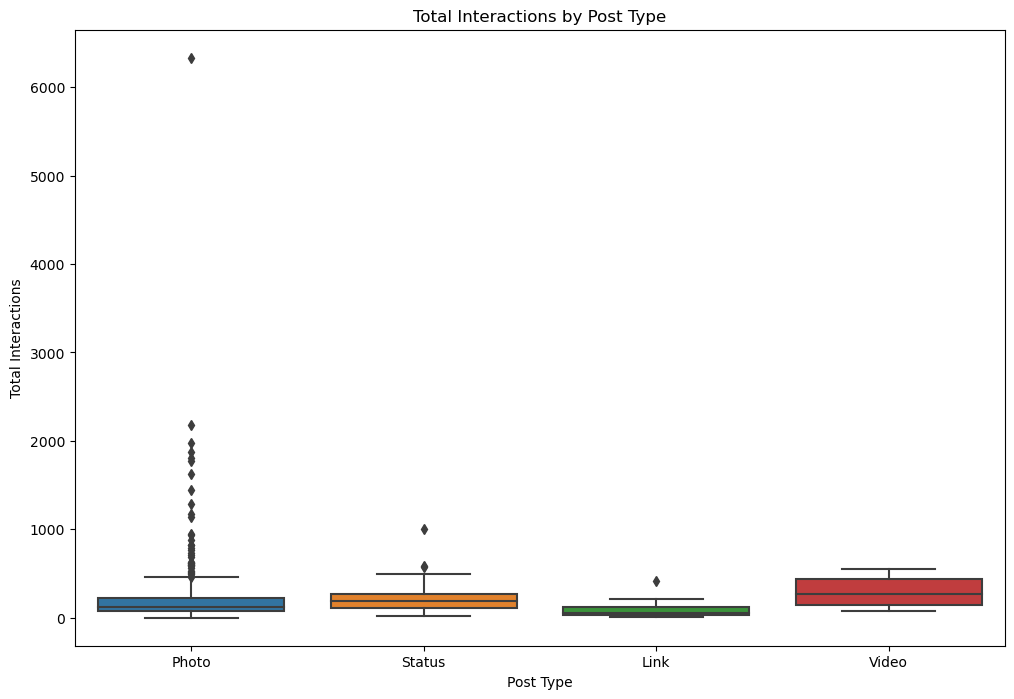

Type
Link       89.045455
Photo     218.805226
Status    217.044444
Video     295.857143
Name: Total Interactions, dtype: float64


In [45]:
# Boxplot for total interactions by post type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Type', y='Total Interactions')
plt.title('Total Interactions by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Total Interactions')
plt.show()

# Average interactions by post type
print(df.groupby('Type')['Total Interactions'].mean())

### Lifetime Post Total Reach vs Total Interactions

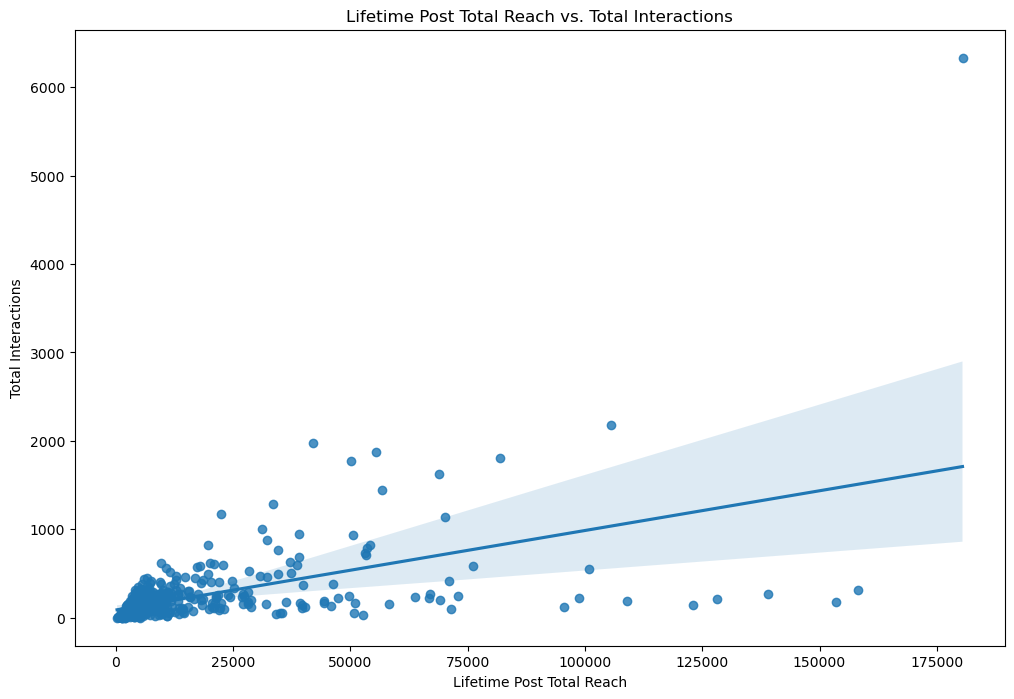

In [46]:
# Scatter plot of lifetime reach vs. total interactions
plt.figure(figsize=(12, 8))
sns.regplot(data=df, x='Lifetime Post Total Reach', y='Total Interactions')
plt.title('Lifetime Post Total Reach vs. Total Interactions')
plt.xlabel('Lifetime Post Total Reach')
plt.ylabel('Total Interactions')
plt.show()

There seems to be a correlation between lifetime post total reached and total interactions. We will check this correlation

In [47]:
# Calculate the correlation coefficient
correlation = df[['Lifetime Post Total Reach', 'Total Interactions']].corr().iloc[0, 1]
print(f'Correlation coefficient between Lifetime Post Total Reach and Total Interactions: {correlation:.2f}')

Correlation coefficient between Lifetime Post Total Reach and Total Interactions: 0.54


A correlation coefficient of 0.54 suggests a moderate positive correlation between 'Lifetime Post Total Reach' and 'Total Interactions', however this is not a perfect correlation and there is some other factors influencing interactions. More posts does not necessarily equal more interactions.

### Does Post Hour Affect Total Interaction?

    Post Hour  Total Interactions
0           1          181.000000
1           2          191.102564
2           3          228.590476
3           4          169.529412
4           5          684.307692
5           6          167.133333
6           7          148.461538
7           8           98.454545
8           9          137.620690
9          10          253.935065
10         11          146.204545
11         12          179.482759
12         13          245.019231
13         14          307.153846
14         15           62.666667
15         16           84.000000
16         17          157.333333
17         18           55.000000
18         19            2.000000
19         20          280.000000
20         22          125.000000
21         23          135.000000


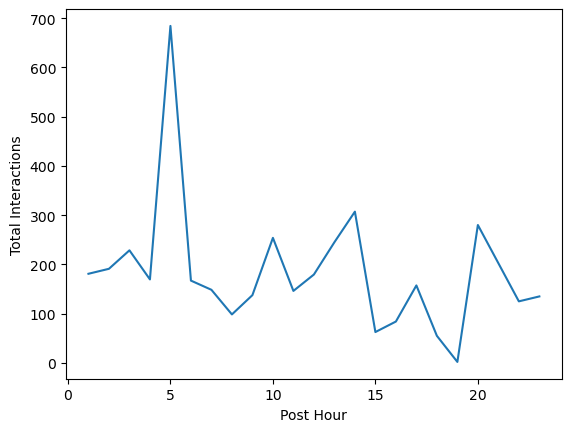

In [48]:
post_hour_interaction = df.groupby('Post Hour')['Total Interactions'].mean().reset_index()
print(post_hour_interaction)

# Visualise Data
sns.lineplot(x=post_hour_interaction['Post Hour'], y=post_hour_interaction['Total Interactions'])
plt.show()

To determine the statistical difference in 'Total Interactions' across 'Post Hour', Use ANOVA test since there are more than 3 groups

In [49]:
# One-way Anova
anova_result = stats.f_oneway(*[df[df['Post Hour'] == hour]['Total Interactions'] for hour in df['Post Hour'].unique()])

print(f'Anova F-statistic: {anova_result.statistic:.4f}')
print(f'p-value: {anova_result.pvalue:.4f}')

Anova F-statistic: 1.4032
p-value: 0.1103


Although F-statistics is > 1, it is still close to 1 and p-value is > 0.05, we accept the null hypothesis that there is no significance difference in 'Total Interaction' across 'Post Hour'

### Paid post vs Non-Paid Posts

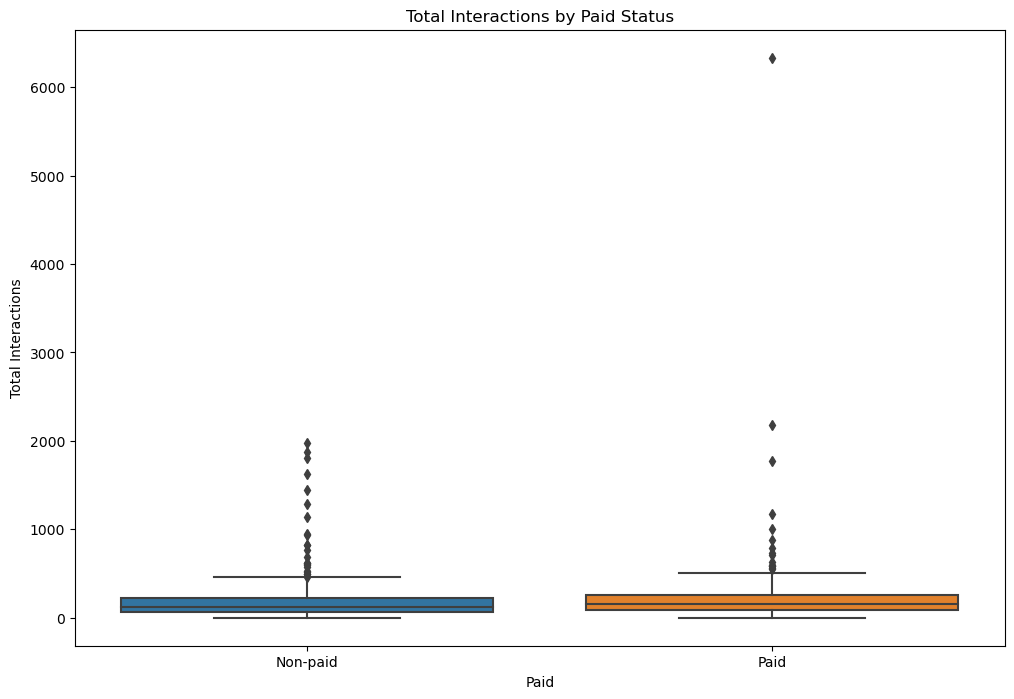

Paid
0.0    188.876404
1.0    278.230216
Name: Total Interactions, dtype: float64

In [50]:
# Boxplot for total interactions by paid status
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Paid', y='Total Interactions')
plt.title('Total Interactions by Paid Status')
plt.xlabel('Paid')
plt.ylabel('Total Interactions')
plt.xticks(ticks=[0, 1], labels=['Non-paid', 'Paid'])
plt.show()

df.groupby('Paid')['Total Interactions'].mean()

To determine the significance of paid posts on total interactions, we do a t-test

In [51]:
# Subset data by paid status
paid_interactions = df[df['Paid'] == 1]['Total Interactions']
non_paid_interactions = df[df['Paid'] == 0]['Total Interactions']

# Check normality
_, p_value_normality_paid = stats.shapiro(paid_interactions)
_, p_value_normality_non_paid = stats.shapiro(non_paid_interactions)

print(f'Normality test p-value for paid interactions: {p_value_normality_paid:.4f}')
print(f'Normality test p-value for non-paid interactions: {p_value_normality_non_paid:.4f}')


Normality test p-value for paid interactions: 0.0000
Normality test p-value for non-paid interactions: 0.0000


Since the p-value for both paid and non-paid interactions are less than 0.05, cannot do t-test and will perform Mann-Whitney U test instead.

In [52]:
# Perform the Mann-Whitney U test
u_stat, p_value_mann_whitney = stats.mannwhitneyu(paid_interactions, non_paid_interactions, alternative='two-sided')

print(f'Mann-Whitney U statistic: {u_stat:.4f}')
print(f'p-value: {p_value_mann_whitney:.4f}')

Mann-Whitney U statistic: 28215.5000
p-value: 0.0152


Since p-value is < 0.05, we reject the null hypothesis and conclude that there is a difference in the distribution of 'Total interactions' between paid and non-paid posts.

### Does post type (photo or video) have an effect in total interactions?

In [53]:
df.groupby('Type')['Total Interactions'].mean()

Type
Link       89.045455
Photo     218.805226
Status    217.044444
Video     295.857143
Name: Total Interactions, dtype: float64

In [54]:
# Subset data into Photos and Videos
photo_interactions = df[df['Type'] == 'Photo']['Total Interactions']
video_interactions = df[df['Type'] == 'Video']['Total Interactions']

# Check normality
_, p_value_normality_photo = stats.shapiro(photo_interactions)
_, p_value_normality_video = stats.shapiro(video_interactions)

print(f'Normality test p-value for photo interactions: {p_value_normality_photo:.4f}')
print(f'Normality test p-value for video interactions: {p_value_normality_video:.4f}')



Normality test p-value for photo interactions: 0.0000
Normality test p-value for video interactions: 0.5242


Since p-value for normality is less than 0.05, photo interactions does not follow a normal distribution. We will proceed again with Mann-Whitney U test instead.

In [55]:
# Perform the Mann-Whitney U test
u_stat, p_value_mann_whitney = stats.mannwhitneyu(photo_interactions, video_interactions, alternative='two-sided')

print(f'Mann-Whitney U statistic: {u_stat:.4f}')
print(f'p-value: {p_value_mann_whitney:.4f}')


Mann-Whitney U statistic: 867.5000
p-value: 0.0621


Since p-value is >0.05, we accept the null hypothesis that there is no significant difference between total interactions for photo and video posts.